In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

In [2]:
expr = pd.read_csv('../../data/tables/X_trainGBM.csv')
last_row_e = expr.index[-1]
expr = expr.drop(last_row_e)
print(expr.head())

  TargetName  TMA 27 R1 | 001 | Geometric Segment  \
0      ATP7B                            49.983944   
1       ERN1                            60.775932   
2      KRT74                            31.239965   
3    SPECC1L                            46.007948   
4      FOXJ1                            45.439949   

   TMA 27 R1 | 002 | Geometric Segment  TMA 27 R1 | 003 | Geometric Segment  \
0                            46.519148                            51.213741   
1                            49.501144                            42.021531   
2                            34.591161                            26.920043   
3                            47.115547                            43.991290   
4                            54.272339                            55.153259   

   TMA 27 R1 | 004 | Geometric Segment  TMA 27 R1 | 005 | Geometric Segment  \
0                            45.655397                            60.557470   
1                            50.591115          

In [3]:

expr.set_index('TargetName', inplace=True)
expr_transposed = expr.transpose()
expr_transposed.to_csv('../../data/tables/X_trainGBM_transposed.csv')
print(expr_transposed.head())
print(expr_transposed.shape)

TargetName                               ATP7B       ERN1      KRT74  \
TMA 27 R1 | 001 | Geometric Segment  49.983944  60.775932  31.239965   
TMA 27 R1 | 002 | Geometric Segment  46.519148  49.501144  34.591161   
TMA 27 R1 | 003 | Geometric Segment  51.213741  42.021531  26.920043   
TMA 27 R1 | 004 | Geometric Segment  45.655397  50.591115  44.421467   
TMA 27 R1 | 005 | Geometric Segment  60.557470  49.547021  39.637617   

TargetName                             SPECC1L      FOXJ1     OR4K15  \
TMA 27 R1 | 001 | Geometric Segment  46.007948  45.439949  58.503934   
TMA 27 R1 | 002 | Geometric Segment  47.115547  54.272339  58.447134   
TMA 27 R1 | 003 | Geometric Segment  43.991290  55.153259  51.870327   
TMA 27 R1 | 004 | Geometric Segment  33.316100  59.228623  53.058975   
TMA 27 R1 | 005 | Geometric Segment  45.142842  67.163740  56.153291   

TargetName                                 PDC      MUC15   C1orf189  \
TMA 27 R1 | 001 | Geometric Segment  40.327955  24.991972  58.

In [4]:

label = pd.read_csv('../../data/tables/y_trainGBM.csv')
print(label.shape)
print(label.head())

(272, 2)
                                Sample  ID
0  TMA 27 R1 | 001 | Geometric Segment   0
1  TMA 27 R1 | 002 | Geometric Segment   0
2  TMA 27 R1 | 003 | Geometric Segment   0
3  TMA 27 R1 | 004 | Geometric Segment   0
4  TMA 27 R1 | 005 | Geometric Segment   0


In [5]:

ID_list = label['ID'].tolist()
print(ID_list)
print("length of ID list is: {}".format(len(ID_list)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
length of ID list is: 272


In [6]:

expr_transposed["ID"] = ID_list
print(expr_transposed.head())

TargetName                               ATP7B       ERN1      KRT74  \
TMA 27 R1 | 001 | Geometric Segment  49.983944  60.775932  31.239965   
TMA 27 R1 | 002 | Geometric Segment  46.519148  49.501144  34.591161   
TMA 27 R1 | 003 | Geometric Segment  51.213741  42.021531  26.920043   
TMA 27 R1 | 004 | Geometric Segment  45.655397  50.591115  44.421467   
TMA 27 R1 | 005 | Geometric Segment  60.557470  49.547021  39.637617   

TargetName                             SPECC1L      FOXJ1     OR4K15  \
TMA 27 R1 | 001 | Geometric Segment  46.007948  45.439949  58.503934   
TMA 27 R1 | 002 | Geometric Segment  47.115547  54.272339  58.447134   
TMA 27 R1 | 003 | Geometric Segment  43.991290  55.153259  51.870327   
TMA 27 R1 | 004 | Geometric Segment  33.316100  59.228623  53.058975   
TMA 27 R1 | 005 | Geometric Segment  45.142842  67.163740  56.153291   

TargetName                                 PDC      MUC15   C1orf189  \
TMA 27 R1 | 001 | Geometric Segment  40.327955  24.991972  58.

In [7]:

ID_col = expr_transposed.pop('ID')
expr_transposed.insert(1, 'ID', ID_col)
expr_transposed.to_csv('../../data/tables/X_trainGBM_transposed_with_ID.csv', index=True)
print(expr_transposed.head())

TargetName                               ATP7B  ID       ERN1      KRT74  \
TMA 27 R1 | 001 | Geometric Segment  49.983944   0  60.775932  31.239965   
TMA 27 R1 | 002 | Geometric Segment  46.519148   0  49.501144  34.591161   
TMA 27 R1 | 003 | Geometric Segment  51.213741   0  42.021531  26.920043   
TMA 27 R1 | 004 | Geometric Segment  45.655397   0  50.591115  44.421467   
TMA 27 R1 | 005 | Geometric Segment  60.557470   0  49.547021  39.637617   

TargetName                             SPECC1L      FOXJ1     OR4K15  \
TMA 27 R1 | 001 | Geometric Segment  46.007948  45.439949  58.503934   
TMA 27 R1 | 002 | Geometric Segment  47.115547  54.272339  58.447134   
TMA 27 R1 | 003 | Geometric Segment  43.991290  55.153259  51.870327   
TMA 27 R1 | 004 | Geometric Segment  33.316100  59.228623  53.058975   
TMA 27 R1 | 005 | Geometric Segment  45.142842  67.163740  56.153291   

TargetName                                 PDC      MUC15   C1orf189  ...  \
TMA 27 R1 | 001 | Geometric Segme

In [8]:
y = expr_transposed['ID'].values
X = expr_transposed.iloc[:, 2:].values
genes = expr_transposed.iloc[:, 2:].columns.to_numpy()
random_state = 1515
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)

In [9]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

In [10]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = np.unique(y_train_enc).size

In [11]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    square_distances=True,
    n_jobs=-1
)

In [12]:
pixel_size = (227,227)
it = ImageTransformer(
    feature_extractor=reducer,
    pixels=pixel_size)

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\sklearn\manifold\_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


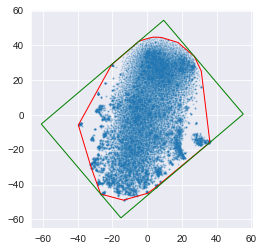

In [13]:
it.fit(X_train, y=y_train, plot=True)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

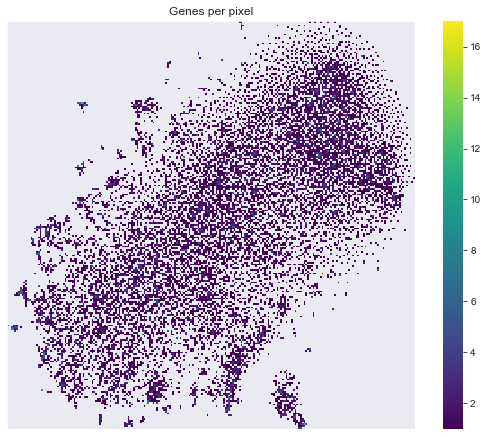

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.,
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Genes per pixel")

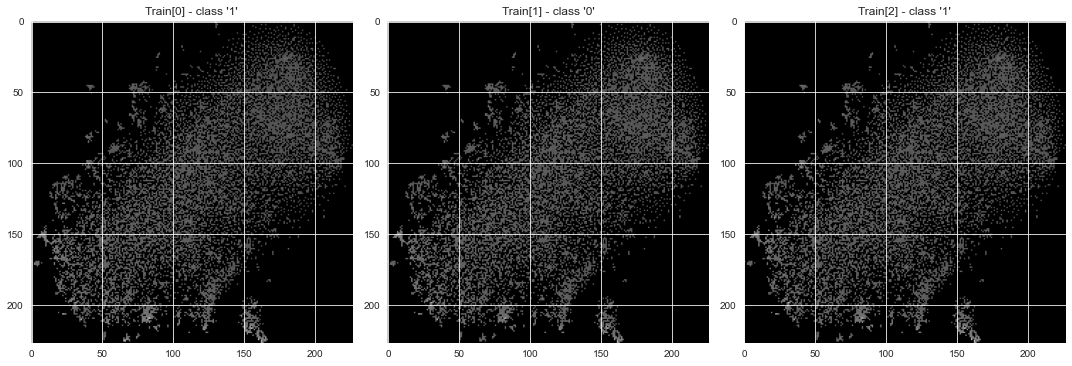

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text(f"Train[{i}] - class '{y_train[i]}'")
plt.tight_layout()

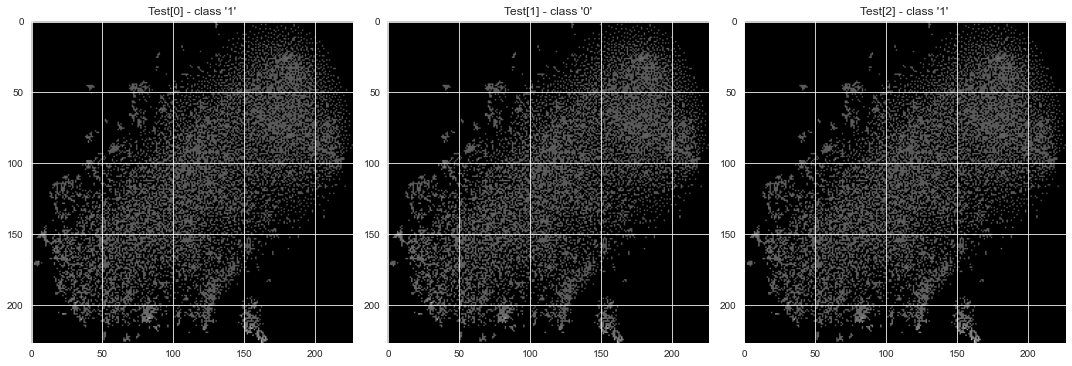

In [16]:
X_test_img = it.transform(X_test_norm)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_test_img[i])
    ax[i].title.set_text(f"Test[{i}] - class '{y_test[i]}'")
plt.tight_layout()

In [17]:
#squeezenet starts here

In [18]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score

import warnings;
warnings.simplefilter('ignore')

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 2080 Ti


In [20]:
net = torch.hub.load(
    'pytorch/vision:v0.10.0', 'squeezenet1_1',
    pretrained=True, verbose=False)

In [21]:
net.cuda()

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): MaxPool2d

In [22]:
print(type(net))
net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1),
                              stride=(1,1)).cuda()

<class 'torchvision.models.squeezenet.SqueezeNet'>


In [23]:
net = net.to(device).cuda()

In [24]:
preprocess = transforms.Compose([
    transforms.ToTensor()
])

In [25]:
X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device).cuda()
y_train_tensor = torch.from_numpy(le.fit_transform(y_train)).to(device).cuda()

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device).cuda()
y_test_tensor = torch.from_numpy(le.transform(y_test)).to(device).cuda()

print(type(X_train_tensor))
print(type(y_train_tensor))
print(type(X_test_tensor))
print(type(y_test_tensor))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [61]:
batch_size = 16

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    net.parameters(),
    lr=1e-04,
    momentum=0.8,
    weight_decay=1e-05
)

In [67]:
for epoch in range(500):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs).cuda()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch statistics
    if not (epoch % 20):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')

[0] loss: 0.686
[20] loss: 0.683
[40] loss: 0.676
[60] loss: 0.679
[80] loss: 0.677
[100] loss: 0.680
[120] loss: 0.673
[140] loss: 0.670
[160] loss: 0.668
[180] loss: 0.669
[200] loss: 0.659
[220] loss: 0.666
[240] loss: 0.651
[260] loss: 0.646
[280] loss: 0.635
[300] loss: 0.625
[320] loss: 0.632
[340] loss: 0.610
[360] loss: 0.599
[380] loss: 0.605
[400] loss: 0.574
[420] loss: 0.610
[440] loss: 0.559
[460] loss: 0.538
[480] loss: 0.513
[499] loss: 0.510


In [69]:
train_predicted = np.empty(0)
train_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        train_predicted = np.append(train_predicted, pred)
        train_true = np.append(train_true, labels.cpu().detach().numpy())

In [70]:
test_predicted = np.empty(0)
test_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        test_predicted = np.append(test_predicted, pred)
        test_true = np.append(test_true, labels.cpu().detach().numpy())

In [71]:
print(f"The train accuracy was {accuracy_score(train_predicted, train_true):.3f}")
print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")

The train accuracy was 0.829
The test accuracy was 0.800
